# Занятие 4. Кластеризация методом k-means (k-средних).
Метод k-средних решает ту же задачу, что и иерархический кластерный анализ. Был предложен МакКуином в 1967 году.

Метод достаточно универсальный, при больших данных он предпочтительнее, чем иерархический анализ, так как последнему требуется много памяти. Также k-means быстрее.

# Идея метода. Алгоритм Ллойда
**Первое ограничение:** заранее нужно знать число кластеров k, что не всегда возможно. Далее выбирается k точек, которые являются центрами кластеров.

Затем применяется цикл, в котором 2 правила:
- сначала каждый объект приписывается к тому кластеру, чей центр ближайший к объекту
- когда все объекты распределились, центр кластера - центр тяжести объектов кластера

Что такое **центр тяжести?**

Есть n точек с координатами x и y. Центр тяжести находится как среднее арифметическое координат, то есть X и Y с чертой сверху (при условии, что вес у каждой точки равнозначен)

**Второе ограничение:** в классическом методе k-means используется только Евклидово расстояние. Это существенный недостаток, т.к. не всегда расстояние отражает схожесть между объектами.

Выходом из положения может послужить **k-медоиды**

Красные точки - центры кластеров

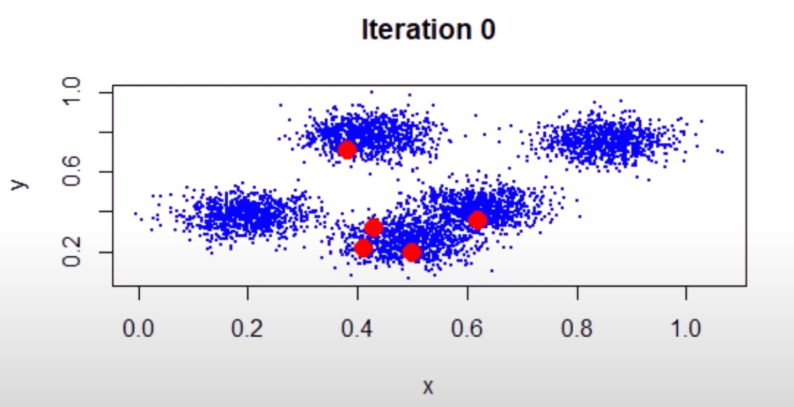

Далее объекты распределяются по кластерам. Объект относится к тому кластеру, чей центр ближе остальных

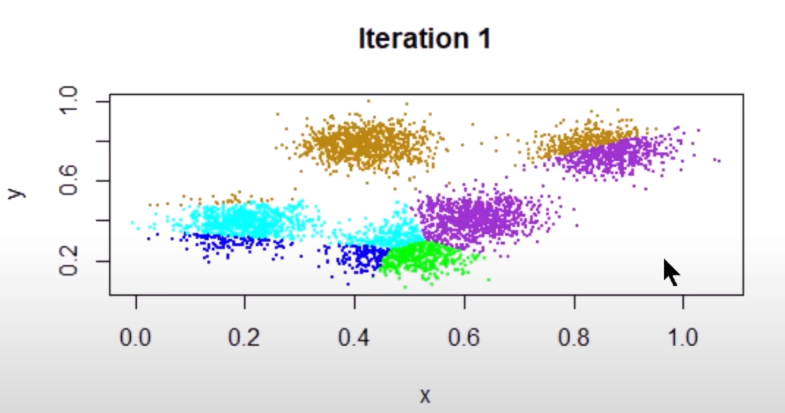

Объявляются кластеры, центры которых центры тяжести сформированных кластеров. Далее алгоритм повторяется. Уточняется центр расположения кластеров и меняется приналдежность объектов к кластерам. В конечном итоге: если после итерации центры кластеров не изменились, то это конец алгоритма, кластеры найдены.

Смотрим дальше. В полученных кластерах снова ищем центр тяжести - черные точки

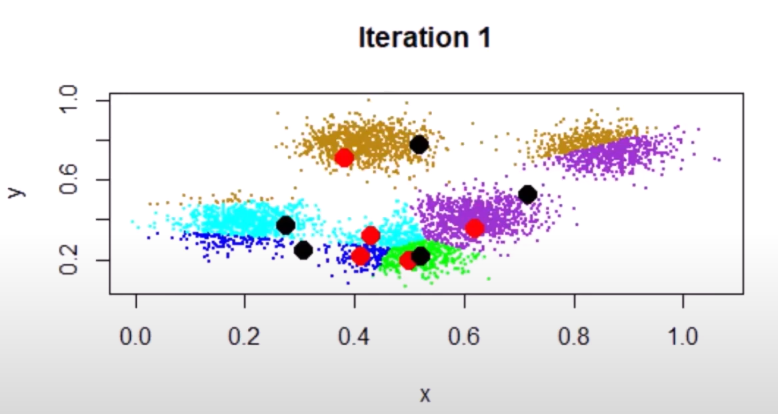

Теперь это новые центроиды кластеров. Далее снова распределяем объекты по кластерам

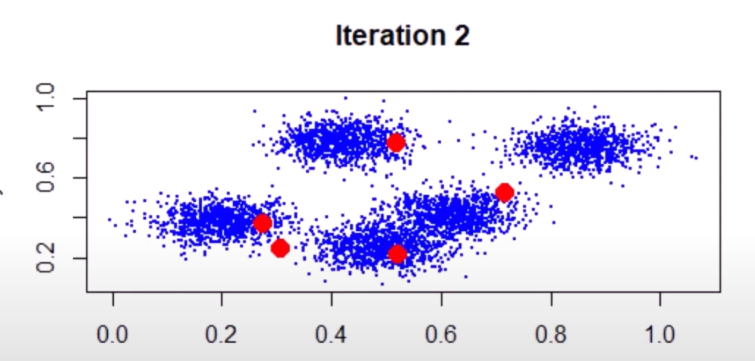

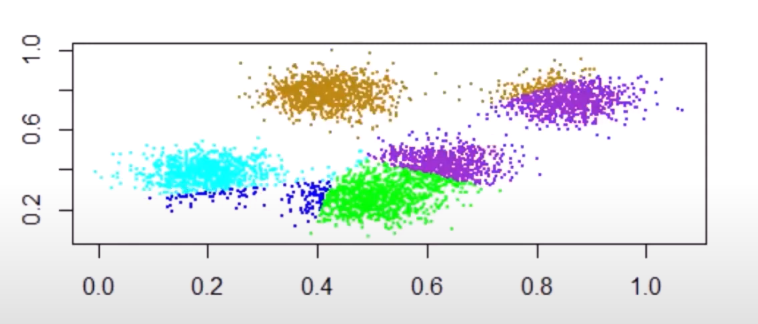

Снова ищем центроиды:

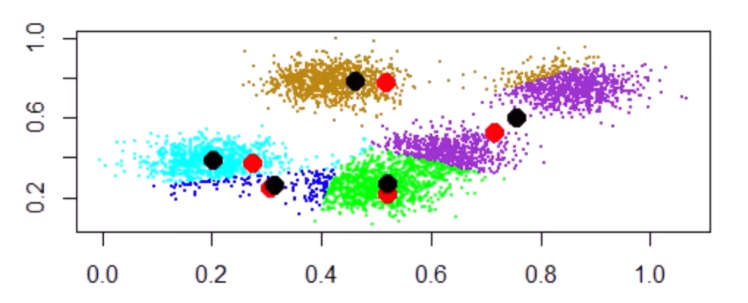

в конечном итоге кластеры объекты перестанут менять кластеры:

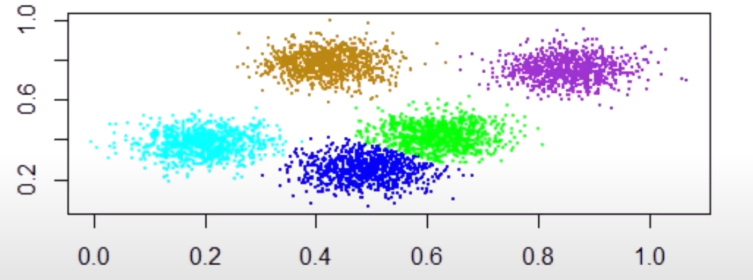

Много итераций в конце будут состоять всего из нескольких перемещений объектов между кластерами, а общая картина вырисовывается раньше. **Поэтому для этого могут усекать число итераций при помощи условия, когда суммарное перемещение центров будет меньше порога. В питоне это tolerance**. Таким образом мы экономим время. Процедура выше также называется обучением.

Еще одна илюстрация метода, который называют наивным k-means:

https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/220px-K-means_convergence.gif

# Начальное расположение центров кластеров
От начального расположения центров кластеров зависит конечный результат обучения. Разберем пример:

Видим 3 облака точек на диаграмме рассеяния. Рассмотрим вариант А.

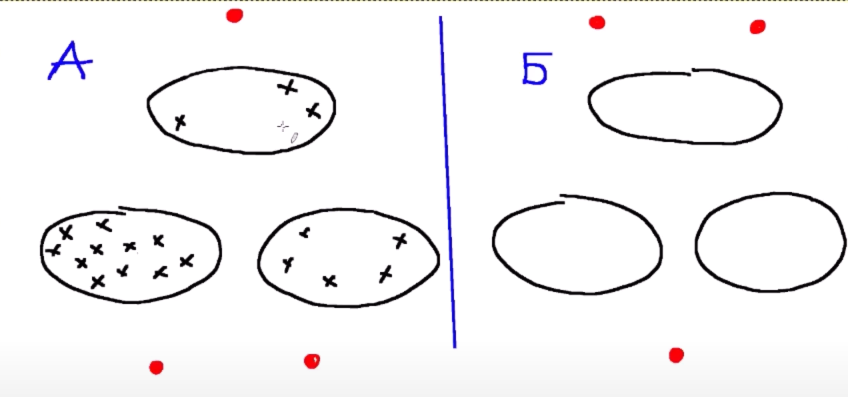

Понятное дело, что центры переместятся в центры кластеров из-за удачного первоначального расположения

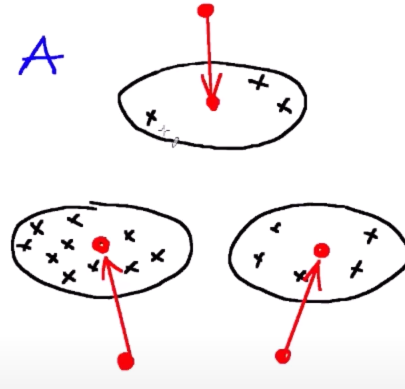

Рассмотрим вариант Б. Здесь неудачное расположение. Нижний центр (при одинаковом наборе объектов в кластераях) переместится между нижними облаками, а два верхних переместятся в верхнее облако

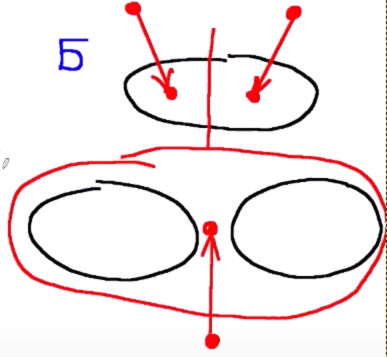

Конечно мы это видим визуально, понимаем на интуитивном уровне (скоро поймем, как оценивать качество).

Рассмотрим вариант С:

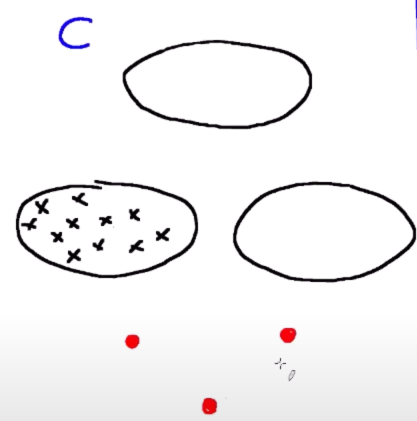

Беда здесь в нижнем кластере: ни один объект не войдет в него, так как все объекты ближе к двум верхним. Кластеризация пойдет не по плану - кластер будет пустым. Такой вариант легко фиксится, если выбрать первоначальное объекты как начальное расположение кластеров.

### Методы определения начального расположения кластеров.
Естественно, мы не хотим, чтобы была зависимость между начальным расположением кластеров и результатом. Есть несколько методов борьбы с этой зависимостью. Есть 2 приема. Первый прием заключается в определении центров кластров следующими методами:
- **Forgy.** Начальные центры в таком методе - объекты кластеров. Выберем 3 центра:

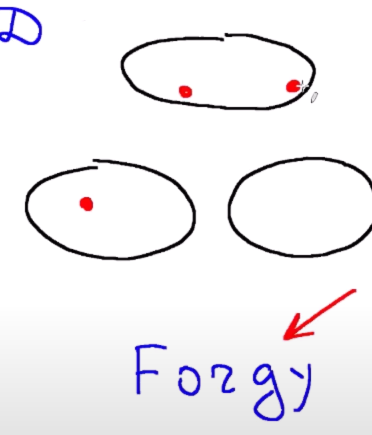

Метод Форджи не самый надежный, но используется по умолчанию много где (но не в питоне)

- **Случайное разбиение** (random partition)

В данном методе начальные кластеры располагаются в центре скопления объектов. То есть сначала существующие объекты будут принадлежать разным кластерам, зотем находятся центры тяжести этих объектов - это и будет начальное расположение кластеров. Проиллюстрируем:

Допустим, надо разбить на 3 кластера. Вероятность попадания объекта в один из кластер равновероятна и равнятеся 1/3.

Распределеим точки по трем кластерам: 

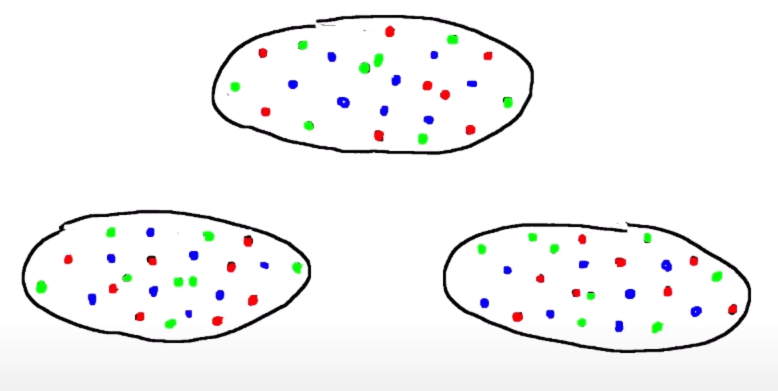

Закон больших чисел говорит, что если точек достаточно много, то центры кластеров будут примерно в одном месте. При чем будут в центре всего исходного набора точек, всего множества объектов:

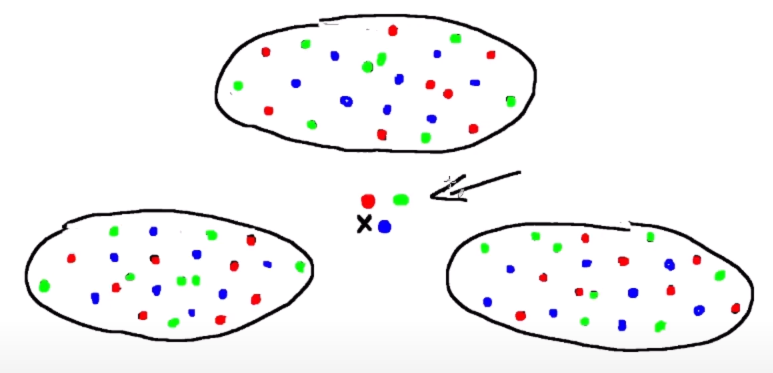

Данный алгоритм сокращает время кластеризации, т.к. 3 центра будут расползаться из центра множества. В sklearn метод также не реализован.
- **K-means++.** Данный метод релизван в *sklearn.cluster.Kmeans* по умолчанию.

Идея метода в следующем. Первым центром тяжести назначается с равной вероятностью объект из множества. Второй центр выбирается также случайно, но не равновозможно: чем дальше наблюдение от первого центра, тем вероятность стать центром второго кластера выше. Т.е. второй ентр должен расолагаться как можно дальше от первого. Конечно есть вероятность того, что второй центр окажется рядом с первым, но вероятность мала.

Есть центр первого кластера - Ц1. Также есть 3 другие точки. Определим вероятность того, что объект станет центром второго кластера:

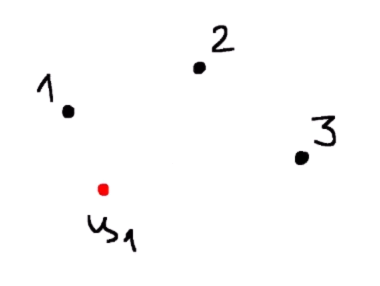

Для определения вероятности надо рассчитать расстояние до Ц1, а затем воспользоваться форумлой - каждое расстояние делим на сумму вероятностей. Чем больше расстояние, тем выше вероятность:

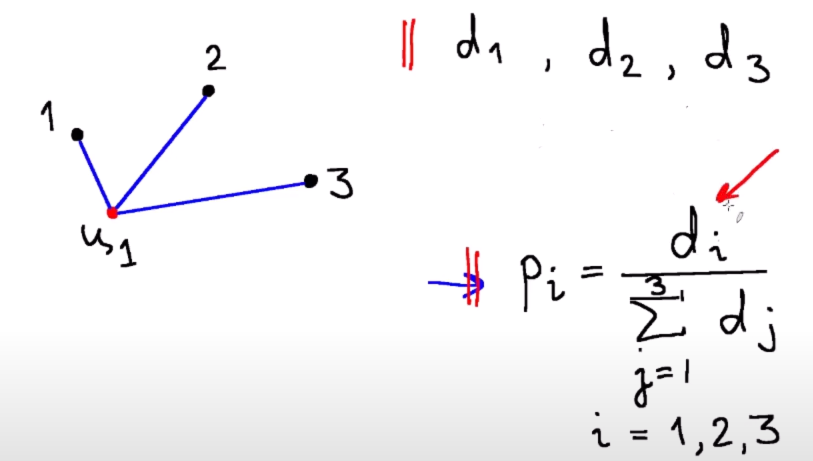

Для третьего центра все аналогично второму центру. Рассмотрим 3 точки и уже 2 центра кластеров:

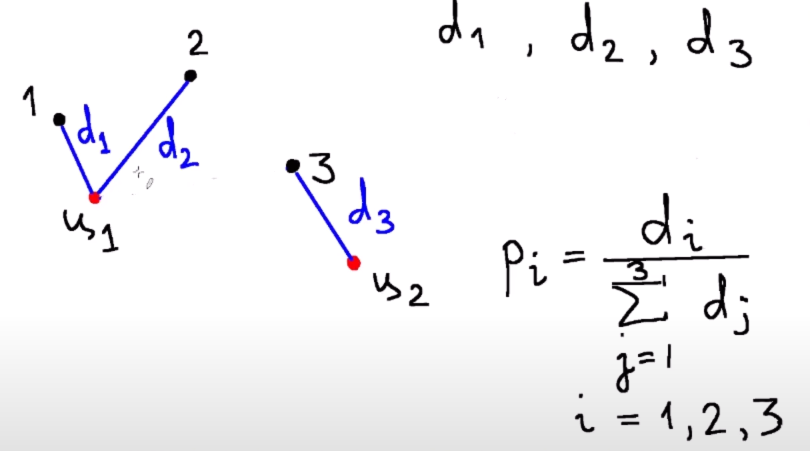

Расстояние d1, d2, d3 считаютсядо ближайших центров. Расстояния посчитаны - вероятность считаем по той же формуле. В общем суть такова, что у самой дальней точки вероятность быть следующим центром кластера выще, чем у других объектов.

Однако, даже если опираться на методы выше, когда начальные центры - объекты, может возникнуть такая же картина, как в Б (см. выше). Зеленым цветом обозначены центры согласно трем методам выше:

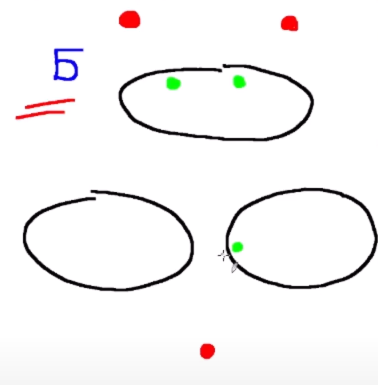

Вероятность такого конечно невысокая, но она есть. Поэтому применяют комбинированные способы: применяют сначал способ выше, а дальше потворяют кластеризацию заново. Из полученных результатов выбирается лучшая кластеризация. Однако как сравнивать качесто кластеризации?
# Критерий качества k-means
Действие алгоритма k-means таково, что он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров:

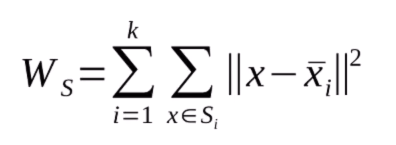

Двойные линии - норма, в данном случае совпадает с Евклидовым расстоянием;

k - число кластеров

S - кластеры. Каждый кластер - список объектов.

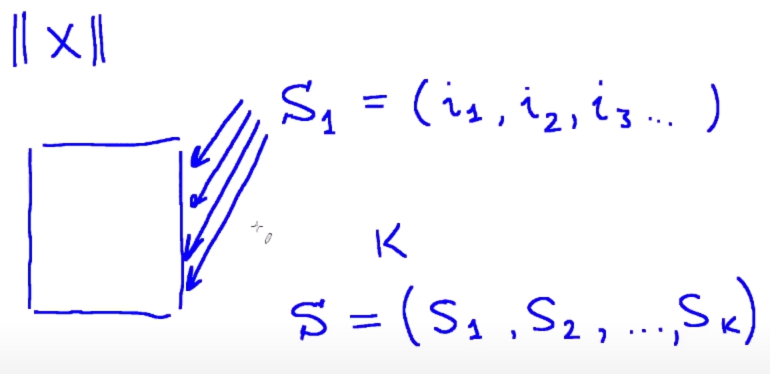

Например в S1 описываются элементы кластера.

x - наблюдение

xi - центр i-того кластера.

**Как вычисляется критерий качества?**

Возьмем i-тый кластер Si. считаем Евклидово расстояние от центра кластера до объекта, возводим в квадрат. Далее квадраты складываются. Если кластер плотный, то точки близки к центру, а значит WSi будет меньше:

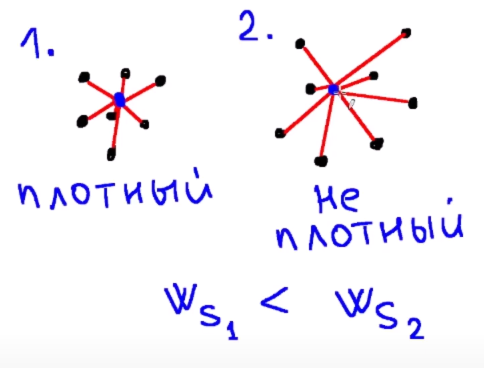

Чтобы измерить качество кластеризации в целом, то надо сложить все WSi. Это и будет критерием качества - чем меньше Ws, тем лучше. Далее выбирается минимальное значение:

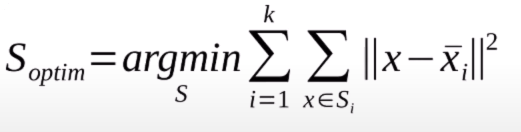

**В итоге:**
1. Фиксируем число кластеров k
2. Подбираем начальное расположение центров кластеров, например k-means++
3. Кластериузем. Получим много вариантов (например, 300)
4. Выбираем минимальное Ws - лучшая кластеризация

**Замечания**
1. Перебирать все возможные кластерзации долго, не имеет смысла искать глобальный минимум Ws. Достаточно найти локальный.
2. Ws уменьшается на каждой итерации алгоритма поиска начальных расположений центров

# Определение числа кластеров
На практике число кластеров заранее неизвестно. **С ростом числа кластеров критерий качества Ws монотонно убывает. Когда быстрое убывание сменяется медленным, то это и будет оптимальное число кластеров.**

Нужно составить список перспективных вариантов числа кластеров. Если нет вообще вариантов и идей, то 2 способа:
- число кластеров от 2 до 100
- число кластеров - степень двойки для предварительной оценки

Для этих вариантов делаем кластеризации: 99 кластеризаций для первого варианта и 9 для второго. Вычисляем значение Ws для каждой кластеризации. Необходимо обратить внимание на скорость убывания функции качества: ведь с ростом числа кластеров Ws уменьшается (минимальной она будет, когда число кластеров=число объектов, т.е. Ws=0).

Для оценки функции Ws можно использовать график каменистой осыпи. По горизонтали число кластеров, по вертикали Ws.

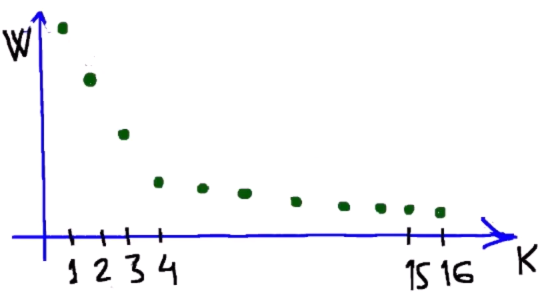

На графике видно, что с увеличением числа кластеров увеличивается качество, но после 4 кластеров функция убывает не так сильно. Похожие объекты в таком случае будут разделятся на разные кластеры, что уменьшает качество.

Проблема тут в том, что все это очень долго. Мало того, что качество кластеризации зависит от начального числа кластеров, так еще и от начального расположения этих кластеров. Получается, что если мы хотим рассмотреть кластеризацию от 2 до 100 кластеров, то еще нужно раз 300 рассмотреть разное начальное расположение. Это долго, требуются большие мощности для большего числа попыток.

Также на практике бывают бугорки:

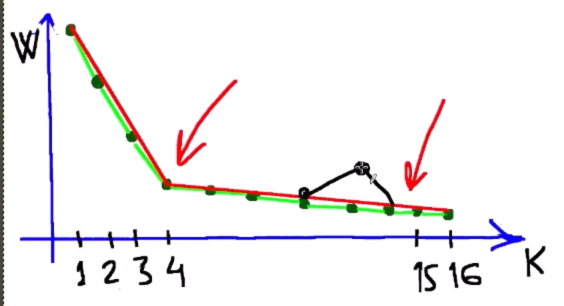

Это противоречит теории, однако теория справедлива только для разумной кластеризации. Бугорок укажет, что для данного числа кластеров была выбрана неудачная кластеризация, т.е. нужно было сделать больше попыток.

Стоит отметить, что при евклидовом расстоянии метод k-means сходится всегда. Однако стоит помнить, что Ws может сходится к локальному минимуму, а не к абсолютному (опять таки это зависит от числа попыток).
# Недостатки k-means
1. Используется только евклидово расстояние (либо написать скрипт самому, либо  использовать в R flex clust, где можно выбирать метод определения свходств между объектами).
2. Решение зависит от расположение начальных центров. Лечится повторением процедуры.
3. Не определяет ленточные кластеры (для этого используется иерархический кластерный анализ по методу ближайшего соседа или DBSCAN)
4. Надо определять число кластеров. Однако все методы этого требуют, в k-means это как раз попроще.
5. Слишком много вычислений расстояний. Однако альтернативные методы также прожорливы. При этом бывает, что кластеры формируются на начальных итерациях, тогда можно объявить этот кластер сформировавшимся и исключить, тем самым сэкономив ресурсы.
### Матрицы попарных расстояний vs матрица данных
Обычно у нас есть матрица данных - это обычный датафрейм с объектами и полями. Однако бывают матрицы попарных расстояний (слева) - матрица n*n, где n - число объектов. По диагонали 0, на пересечнии i-ой строки и j-того столбца это расстояние между объектами (т.е. их схожесть).

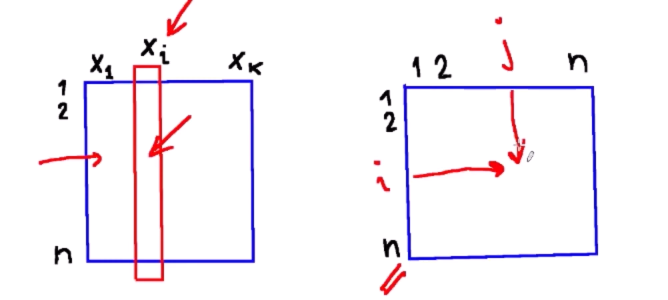


В таком случае (если расстояние симметрично, то есть расстяоние 1 2 = расстоянию 2 1) прибегают к методу **поиска наилучшей проекции (projection pursuit)**.
1. Многомерное шкалирование (multidimensional scaling)
2. Множественный анализ соответствий (multiple correspondence analysis) - для переменных, измерененных в номинальной шкале

Решением данной проблемы является метод k-медоид.
# k-medoids
Медоид - точка кластера, для которой минимальна сумма расстояний до других точек этого кластера. То есть метод аналогичен k-means, но меняется понятие центра кластера - вместо центроида медоид. 

Выгода при переходе к медоидам - медоид является объектом, тогда как центроид может только совпасть. Раз медоид это объект, значит он есть в матрице попарных расстояний, то есть будет известно расстояние от медоида до остальных объектов.
В остальном же метод аналогичен - при итерациях меняется вместо центроидов медоиды.

Метод медоидов также модифицируется (например меняется метод измерения близости).

# Улучшения метода k-means
Метод имеет множество модификаций:
- X-means
- C-means (нечеткий алгоритм кластеризации)
- FOREL
- Mini Batch K-Means
- ...

В **X-means** есть ограничение: предполагается нормальность совместного  распределения в каждом кластере, т.е. минимум не будет ленточных кластеров, изогнутых областей, только **элипсоиды**

В **C-means** каждому объекту сопоставялется вектор вероятности принаджежности к кластерам. Если кластеров 3, то у каждого объекта 3 вектора вероятности:

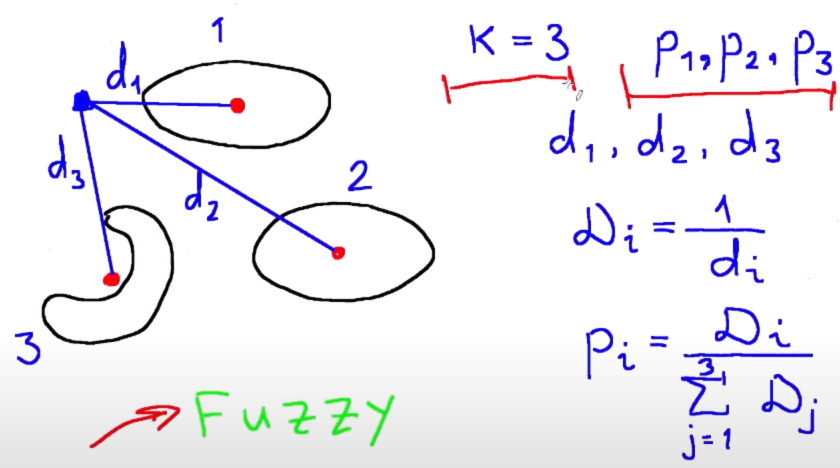

По факту это нечеткая кластеризация - вычисляются вероятности принадлежности к кластеру, затем какая больше, к такому и принадлежит - по факту идет сначала нечеткая кластеризация, а затем округление.

Например, на картинке выше высчитываются расстояния до центров кластеров. Далее эти расстояния переводятся в вероятности: делим 1 на каждое расстояние, а затем нормируем - делим Di на сумму всех D. Pi считаются для каждого объекта.

**FOREL (формальный элемент)** сейчас практически не используется из-за тежеловесности.

**Mini Batch K-Means** это попытка использовать k-means на больших данных. Mini Batches - подмножества набора данных, случайно выбираются из каждой итерации. Размер батча выбирается так, чтобы он влез в ОЗУ. Естественно, кластеризация в таком случае становится хуже, но остается адекватной.

При обновлении центров кластеров при каждой итерации используется только один батч. На практике различия в качестве кластеризаций может быть малы. Более подробно здесь:
https://scikit-learn.org/stable/modules/clustering.html

### Алгоритм Mini Batch K-Means
Обозначения:

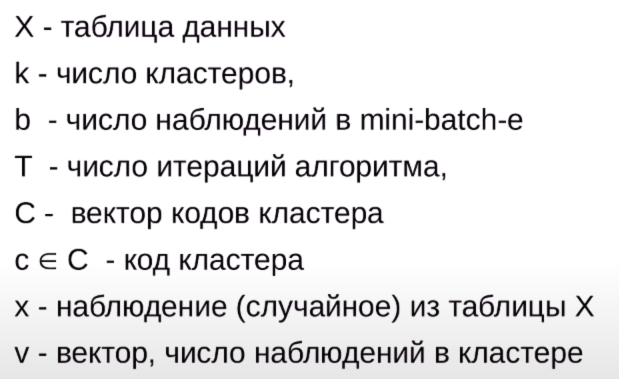

Псевдокод, описывающий алгоритм:

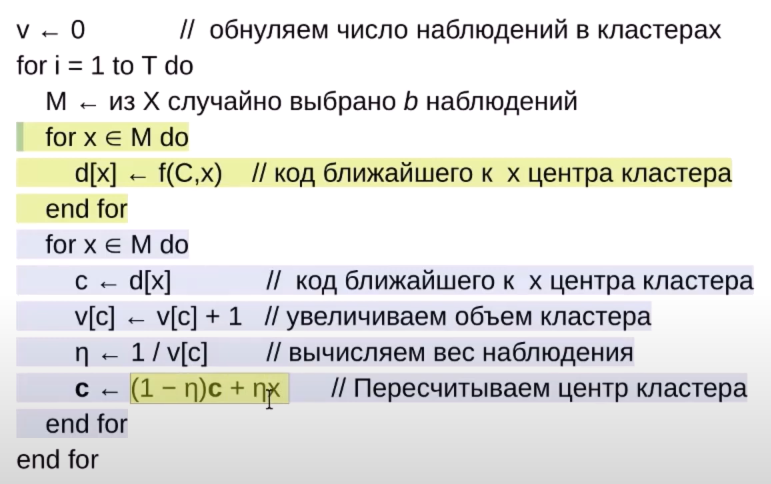

Описание:

- в каждом кластере 0
- каждая итерация - из таблицы наблюдаем b наблюдений
- для каждого наблюдения находим его кластер
- второй вложенный цикл: начинаем перебирать наблюдения из батча
- вспоминаем кластер для каждого объекта
- увеличиваем объем кластера на 1
- вычисляем вес наблюдения как 1/v[c]
- пересчет средне взвешенного кластера

Здесь среднее арифметическое n+1 элементов выражается через среднее первых n элементов Xn. Логика вычисления 1/v[c]:

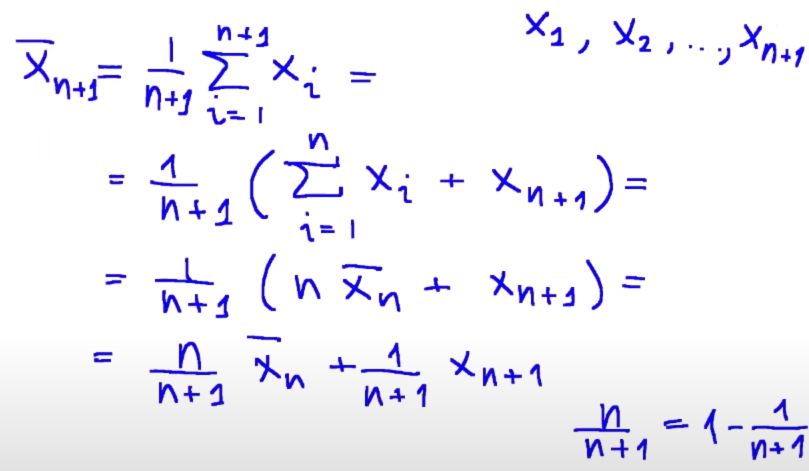

Mini Batch K-Means и K-Means это родственники градиентного спуска. Градиентный спуск будет рассматриваться позже.
